In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving allyears2k.csv to allyears2k.csv
User uploaded file "allyears2k.csv" with length 4624733 bytes


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('allyears2k.csv', sep=',', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,43978.0,1997.500000,6.344361,1987.0,1992.0,1997.5,2003.0,2008.0
Month,43978.0,1.409091,1.874711,1.0,1.0,1.0,1.0,10.0
DayofMonth,43978.0,14.601073,9.175790,1.0,6.0,14.0,23.0,31.0
DayOfWeek,43978.0,3.820615,1.905013,1.0,2.0,4.0,5.0,7.0
DepTime,42892.0,1345.846661,465.340899,1.0,929.0,1330.0,1735.0,2400.0
CRSDepTime,43978.0,1313.222861,476.251140,0.0,910.0,1320.0,1720.0,2359.0
ArrTime,42783.0,1504.634130,484.347488,1.0,1118.0,1527.0,1917.0,2400.0
CRSArrTime,43978.0,1485.289167,492.750434,0.0,1109.0,1516.0,1903.0,2359.0
FlightNum,43978.0,818.842990,777.404369,1.0,204.0,557.0,1242.0,3949.0
ActualElapsedTime,42783.0,124.814529,73.974442,16.0,71.0,101.0,151.0,475.0


In [5]:
df = data.dropna(subset= ['ArrDelay','AirTime','Distance','DepDelay'])
df = df.sample(frac = 1).head(5000)

X = df[['AirTime','Distance','DepDelay']]
Y = df[['ArrDelay']]

## Validación Interna & Externa


In [53]:
regrINTERNA = linear_model.LinearRegression()
regrINTERNA.fit(X, Y)
prediccionesINTERNA = regrINTERNA.predict(X)
print('R2 Interna: ', r2_score(Y, prediccionesINTERNA))

R2:  0.8620351201633536


##Validacion Externa Simple

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = .2, random_state = 10)

In [55]:
regrEXTERNA = linear_model.LinearRegression()
regrEXTERNA.fit(X_train, y_train)
prediccionesEXTERNA = regrEXTERNA.predict(X_test)
print('R2 Externa: ', r2_score(y_test, prediccionesEXTERNA))

R2 Externa:  0.8671223659812534


### K-Folds Validación Cruzada Externa

In [56]:
df_2 = data.dropna(subset= ['ArrDelay','AirTime','Distance','DepDelay'])
df_2 = df_2.sample(frac = 1).head(5000)

df_2 = df_2.reset_index()

X_2 = df_2[['AirTime','Distance','DepDelay']]
Y_2 = df_2[['ArrDelay']]

In [60]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True)
kf.get_n_splits(X_2)

10

In [62]:
regr = linear_model.LinearRegression()

resultados = []

for train_index, test_index in kf.split(X_2):
  X_train, X_test = X_2.loc[train_index,], X_2.loc[test_index,]
  y_train, y_test = Y_2.loc[train_index], Y_2.loc[test_index]
  regr.fit(X_train, y_train)
  predicciones = regr.predict(X_test)
  print('R2: ', r2_score(y_test, predicciones))
  resultados.append(r2_score(y_test, predicciones))

print('R2 medio: ', np.mean(resultados))

R2:  0.8908364339177757
R2:  0.8816455105465072
R2:  0.8563968047009418
R2:  0.9045737088507504
R2:  0.8816014187349712
R2:  0.8298970972301887
R2:  0.8995024106642612
R2:  0.7686530002286598
R2:  0.8910257315450462
R2:  0.8816111705256288
R2 medio:  0.8685743286944732


###Leave One Out

In [69]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

In [81]:
df_3 = data.dropna(subset= ['ArrDelay','AirTime','Distance','DepDelay'])
df_3 = df_3.sample(frac = 1).head(5000)

df_3 = df_3.reset_index()

X_3 = df_3[['AirTime','Distance','DepDelay']]
Y_3 = df_3[['ArrDelay']]

In [82]:
loo = LeaveOneOut()

In [ ]:
for train_index, test_index in loo.split(X_3):
  X_train, X_test = X_3.loc[train_index,], X_3.loc[test_index,]
  y_train, y_test = Y_3.loc[train_index], Y_3.loc[test_index]
  regr.fit(X_train, y_train)
  predicciones = regr.predict(X_test)
  print('Error: ', (y_test - predicciones[0])**2)

##Neuronal Netwoork

In [85]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [102]:
df_4 = data.dropna(subset= ['ArrDelay','AirTime','Distance','DepDelay','TaxiIn','TaxiOut'])
df_4 = df_4.sample(frac = 1).head(1000)

X_4 = df_4[['AirTime','Distance','DepDelay','TaxiIn','TaxiOut']]
Y_4 = df_4[['ArrDelay']]

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_4, Y_4, test_size = .2, random_state = 1)

In [143]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
clf = MLPRegressor(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (500, ), activation = 'relu', max_iter = 1000000)  #warn = True para guardar el ultimo minimo global

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)
print('R Cuadrado: ', r2_score(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R Cuadrado:  0.5955966289570438


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


###XGBooster

In [158]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [160]:
df_5 = data.dropna(subset= ['ArrDelay','AirTime','Distance','DepDelay','TaxiIn','TaxiOut'])
df_5 = df_5.sample(frac = 1).head(10000)

X_5 = df_5[['AirTime','Distance','DepDelay','TaxiIn','TaxiOut']]
Y_5 = df_5[['ArrDelay']]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_5, Y_5, test_size = .2, random_state = 1)

In [162]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = XGBRegressor(n_jobs = -1, 
                     learning_rate = .5,
                     max_depth = 2,
                     colsample_bytree = 1,
                     verbosity = 2,
                     subsample = 1,
                     n_estimators = 500)

model.fit(X_train, y_train)

In [165]:
predictions = model.predict(X_test)
print('R cuadrado: ', r2_score(y_test, predictions))

R cuadrado:  0.9427451164181492


##Seleccionar variables en machine learning

In [166]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [168]:
df_5 = data.dropna(subset= ['AirTime','Distance','DepDelay','TaxiIn','TaxiOut','DayofMonth','Month','DepTime','WeatherDelay','ArrDelay'])
df_5 = df_5.sample(frac = 1).head(1000)

In [169]:
X_5 = df_5[['AirTime','Distance','DepDelay','TaxiIn','TaxiOut','DayofMonth','Month','DepTime','WeatherDelay']]
Y_5 = df_5[['ArrDelay']]

In [171]:
regr = linear_model.LinearRegression()
regr.fit(X_5, Y_5)
predicciones = regr.predict(X_5)

In [173]:
X2 = sm.add_constant(X_5)
est = sm.OLS(Y_5, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2131.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:33:44   Log-Likelihood:                -3637.8
No. Observations:                1000   AIC:                             7294.
Df Residuals:                     991   BIC:                             7338.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AirTime          0.3721      0.021     17.495   

### Seleccionar variables de modo automatico

In [191]:
from sklearn.feature_selection import RFE
from sklearn import linear_model
import pandas as pd

In [ ]:
data.describe().T

In [208]:
df_6 = data.dropna(subset= ['AirTime','Distance','TaxiIn','TaxiOut','DayOfWeek','DayofMonth','Month','DepDelay','WeatherDelay'])
df_6 = df_6.sample(frac = 1).head(10000)

X_6 = df_6[['AirTime','Distance','TaxiIn','TaxiOut','DayOfWeek','DayofMonth','Month','DepDelay','WeatherDelay']]
Y_6 = df_6[['ArrDelay']]

regr = linear_model.LinearRegression()

In [212]:
selector = RFE(estimator = regr, n_features_to_select = 1)
selector.fit(X_6, Y_6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=1, step=1, verbose=0)

In [213]:
print(selector.ranking_)   #Reducir la dimensionalidad de una base de datos

[6 7 3 2 8 4 9 1 5]


In [214]:
X_6.columns[selector.support_]

Index(['DepDelay'], dtype='object')

###Selección de parametros de Machine Learning

In [215]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [216]:
df_7 = data.dropna(subset= ['AirTime','Distance','TaxiIn','TaxiOut','DepDelay'])
df_7 = df_7.sample(frac = 1).head(10000)
X_7= df_7[['AirTime','Distance','TaxiIn','TaxiOut','DepDelay']]
Y_7 = df_7[['ArrDelay']]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X_7, Y_7, test_size = .2, random_state = 1)

In [218]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [219]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
alphas = [0.000001, 0.0001, 0.01, 0.1]
layers = [5, 10, 50, 100]
solvers = ['lbfgs', 'adam']

In [ ]:
print(len(alphas) * len(layers) * len(solvers))

In [ ]:
for alpha in alphas:
  for layer in layers:
    for solver in solvers:
      clf = MLPRegressor(solver = solver,
                         alpha = alpha,
                         hidden_layer_sizes = (layer,),
                         warm_start = True,
                         max_iter = 10000)
      model = clf.fit(X_train,y_train)
      predictions = model.predict(X_test)
      print('R Cuadrado: ', r2_score(y_test, predictions), '  Solver: ', solver, '  Layers: ', layer, ' Alpha: ', alpha)
      #Groupby

##Seleccion Automatica de Parametros de Machine Learning

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [7]:
df_8 = data.dropna(subset= ['AirTime','Distance','TaxiIn','TaxiOut','DepDelay'])
df_8 = df_8.sample(frac = 1).head(10000)
X_8= df_8[['AirTime','Distance','TaxiIn','TaxiOut','DepDelay']]
Y_8 = df_8[['ArrDelay']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_8, Y_8, test_size = .2, random_state = 1)

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [256]:
parametros = {'alpha' : [0.0001, 0.01, 0.00001],
              'solver':('lbfgs','adam'),
              'learning_rate':('constant','adaptive')}

nn = MLPRegressor(warm_start = True,
                  max_iter = 100000)
clf = GridSearchCV(nn, parametros, cv = 5, n_jobs = -1)
clf.fit(X_8,Y_8)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=100000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.

In [15]:
print(clf.best_params_)

{'alpha': 1e-05, 'learning_rate': 'adaptive', 'solver': 'adam'}


In [16]:
parametros = {'alpha' : [0.0001, 0.01, 0.00001],
              'solver':('lbfgs','adam'),
              'learning_rate':('constant','adaptive')}

nn = MLPRegressor(warm_start = True,
                  max_iter = 100000,
                  hidden_layer_sizes=(50,))
clf = GridSearchCV(nn, parametros, cv = 5, n_jobs = -1)
clf.fit(X_8,Y_8)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(50,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=100000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0

In [17]:
print(clf.best_params_)

{'alpha': 0.01, 'learning_rate': 'constant', 'solver': 'lbfgs'}


## Fundamentos del Principal Componets Analysis PCA

In [19]:
!pip sklearn.descomposition

ERROR: unknown command "sklearn.descomposition"


In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
df_9 = data.dropna(subset= ['AirTime','Distance','TaxiIn','TaxiOut','DepDelay','ArrDelay'])
df_9 = df_9.sample(frac = 1).head(10000)
X_9= df_9[['AirTime','Distance','TaxiIn','TaxiOut','DepDelay','ArrDelay']]


scaler = StandardScaler()
scaler.fit(X_9)

X_9 = scaler.transform(X_9)

In [25]:
pca = PCA(n_components = 2)
pca.fit(X_9)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# AirTime ,Distance ,TaxiIn, TaxiOut, DepDelay, ArrDelay.

print(np.round(pca.components_, 2))

[[ 0.48  0.47  0.14  0.29  0.45  0.49]
 [-0.51 -0.52  0.02  0.11  0.47  0.49]]


In [29]:
pca.explained_variance_ratio_

array([0.3676784 , 0.30499998])

In [32]:
A = pca.explained_variance_ratio_[0] 
B = pca.explained_variance_ratio_[1]

total = A + B

In [34]:
total *100

67.26783719057205

In [38]:
nuevosvalores = pca.transform(X_9)

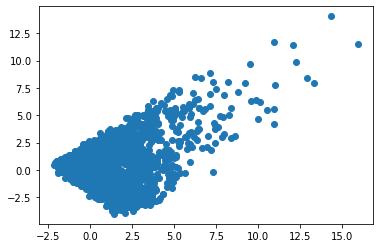

In [40]:
plt.scatter(nuevosvalores[:,0], nuevosvalores[:,1])

##Imputación de valores en Machine Learning

In [48]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model
import numpy as np
import pandas as pd

In [53]:
df_10 = data.dropna(subset= ['AirTime','Distance','TaxiIn','TaxiOut','DepDelay','ArrDelay'])
df_10 = df_10.sample(frac = 1).head(10000)
X_10= df_10[['AirTime','Distance','TaxiIn','TaxiOut','DepDelay','ArrDelay','CarrierDelay']]


In [54]:
X_10

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
34147,113.0,910.0,5.0,9.0,-8.0,-13.0,0.0
39800,59.0,399.0,4.0,7.0,13.0,-2.0,0.0
26096,128.0,872.0,10.0,16.0,32.0,39.0,NaN
21573,95.0,602.0,2.0,11.0,-4.0,-7.0,NaN
21649,90.0,602.0,4.0,9.0,-4.0,-8.0,NaN
...,...,...,...,...,...,...,...
22588,276.0,1999.0,5.0,19.0,0.0,-5.0,NaN
42835,136.0,1036.0,3.0,7.0,32.0,3.0,NaN
42074,183.0,1588.0,6.0,15.0,26.0,20.0,18.0
43816,48.0,254.0,3.0,11.0,2.0,-1.0,NaN


In [49]:
#Imputar los valores faltantes por un estadistico de centralidad (Media, Moda, Mediana) es ERRONEA 
# no incrementan la varianza si no que la disminuyes no generan variabilidad
#la media se comporta más estable que la mediana

imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(X_10)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [50]:
X_10 = imp.fit_transform(X_10)

In [51]:
pd.DataFrame(X_10)

,0,1,2,3,4,5,6
0,103.0,920.0,6.0,13.0,47.0,28.0,4.439221
1,124.0,951.0,6.0,9.0,10.0,-1.0,4.439221
2,64.0,330.0,6.0,9.0,0.0,-7.0,4.439221
3,227.0,1587.0,4.0,32.0,19.0,21.0,4.439221
4,223.0,1587.0,3.0,26.0,5.0,20.0,4.439221
...,...,...,...,...,...,...,...
9995,82.0,551.0,4.0,14.0,-4.0,-2.0,4.439221
9996,80.0,602.0,3.0,10.0,20.0,6.0,4.439221
9997,203.0,1506.0,11.0,10.0,0.0,-8.0,4.439221
9998,89.0,602.0,2.0,8.0,-1.0,-12.0,4.439221


In [55]:
#Forma más interesante
#Estructura de correlación
X_10.corr()

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
AirTime,1.000000,0.979642,0.082388,0.142898,0.064469,0.080351,0.035661
Distance,0.979642,1.000000,0.091060,0.131692,0.069633,0.048891,0.036976
TaxiIn,0.082388,0.091060,1.000000,0.043949,-0.005265,0.101453,-0.044404
TaxiOut,0.142898,0.131692,0.043949,1.000000,0.083466,0.338197,0.014879
DepDelay,0.064469,0.069633,-0.005265,0.083466,1.000000,0.903654,0.532244
ArrDelay,0.080351,0.048891,0.101453,0.338197,0.903654,1.000000,0.495916
CarrierDelay,0.035661,0.036976,-0.044404,0.014879,0.532244,0.495916,1.000000


In [56]:
X_10 = X_10.dropna(subset = ['DepDelay','ArrDelay'])
newX = X_10[['DepDelay','ArrDelay','CarrierDelay']]
newX_train =  newX[np.isnan(X_10.CarrierDelay) == False]

regr = linear_model.LinearRegression()
regr.fit(newX_train[['DepDelay','ArrDelay']], newX_train['CarrierDelay'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
regr.coef_

array([0.22276046, 0.01154005])

In [59]:
valores_imputacion = newX[np.isnan(X_10.CarrierDelay)]
valores_imputacion = valores_imputacion[['DepDelay','ArrDelay']]

In [60]:
nuevos_valores = regr.predict(valores_imputacion)

In [62]:
X_10.loc[np.isnan(X_10.CarrierDelay),'CarrierDelay'] = nuevos_valores

In [64]:
X_10.head(25)    #Mejor Imputación

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay,CarrierDelay
34147,113.0,910.0,5.0,9.0,-8.0,-13.0,0.000000
39800,59.0,399.0,4.0,7.0,13.0,-2.0,0.000000
26096,128.0,872.0,10.0,16.0,32.0,39.0,8.027957
21573,95.0,602.0,2.0,11.0,-4.0,-7.0,-0.522262
21649,90.0,602.0,4.0,9.0,-4.0,-8.0,-0.533802
33462,63.0,403.0,4.0,7.0,-8.0,-24.0,-1.609485
25039,50.0,228.0,5.0,18.0,22.0,33.0,5.731112
17227,38.0,198.0,3.0,8.0,2.0,-6.0,0.825841
27633,95.0,602.0,8.0,31.0,-1.0,15.0,0.399900
24430,282.0,2521.0,6.0,27.0,-3.0,3.0,-0.184101
